In [ ]:
pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.3 MB/s eta 0:00:00


In [ ]:
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=oZq8aHBchMUVI7pOyRIytzrVrkxll7eryue9eYYUWgU&tc=MXk9410e6tCtOnzB0Y6gnM6bilC89-5Nwf-ZAVcaf7M&cc=I2adI2Fwrq87zXJf_x14fqg6eYemSoDxovNBoin5vBg

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXlU8MjkKRgF1XIFMKYWfbOJFL_rca_bRXIue4HL52MFpMHQQYc7qaA

Successfully saved authorization token.


In [ ]:
import geemap

In [ ]:
ROI = ee.Geometry.Polygon(
    [
      [71.49,17.71],
      [73.49,17.71],
      [73.49,19.85],
      [71.49,19.85],
      [71.49,17.71]
    ]

)
ROI_lo = ee.Geometry.Polygon([
    [76.49,19.96],
     [76.52,19.96],
     [76.52,19.98],
     [76.49,19.98],
     [76.49,19.96]
])
ROI_BOB = ee.Geometry.Polygon([
    [81.45,14.85],
      [83.25,14.85],
      [83.25,16.95],
      [81.45,16.95],
      [81.45,14.85]
])
ROI_South = ee.Geometry.Polygon(
    [
     [73.75,9.74],
     [76.87,9.74],
     [76.87,12.39],
     [73.75,12.39],
     [73.75,9.74],
    ]
)


In [ ]:
Map=geemap.Map()
Map_lonar=geemap.Map()
Map_BOB=geemap.Map()
Map_South = geemap.Map()

In [ ]:
sentinel_size =  ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(ROI)
sentinel_size.size()

In [ ]:
sentinel = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(ROI).filterDate('2021-12-01', '2021-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)).select(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B11','B12']).median().clip(ROI)

green = sentinel.select ('B3');
vnir = sentinel.select ('B8');
ndwi = green.subtract(vnir).divide(green.add(vnir)).rename('ndwi');
ndwiParams = {'min':-1, 'max':1, 'palette': ['black','white','yellow']};
Map.addLayer(ndwi, ndwiParams, 'NDWI Image');

Map.setCenter(72.63,18.83,zoom=7)
    # 72.63,18.83
    # 73.36, 19.19



In [ ]:
Map

Map(center=[18.83, 72.63], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

In [ ]:
sentinel_Lonar = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(ROI_lo).filterDate('2021-12-01', '2021-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)).select(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B11','B12']).median().clip(ROI_lo)
ndwi_lonar = sentinel_Lonar.normalizedDifference(['B3','B8']).rename("ndwi_Lonar");
ndwiParams_lonar = {'min':-1, 'max':1, 'palette': ['black','white','blue']};
Map_lonar.addLayer(ndwi_lonar, ndwiParams_lonar, 'NDWI Image');
Map_lonar.setCenter(76.50,19.97,zoom=12)
    # 72.63,18.83
    # 73.36, 19.19


In [ ]:
Map_lonar

Map(center=[19.97, 76.5], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI…

In [ ]:
sentinel_BOB = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(ROI_BOB).filterDate('2021-12-01', '2021-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)).select(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B11','B12']).median().clip(ROI_BOB)
ndwi_BOB = sentinel_BOB.normalizedDifference(['B3','B8']).rename("ndwi_BOB");
ndwiParams_BOB = {'min':-1, 'max':1, 'palette': ['black','white','blue']};
Map_BOB.addLayer(ndwi_BOB, ndwiParams_BOB, 'NDWI Image');
Map_BOB.setCenter(82.52,15.90,zoom=7)


In [ ]:
Map_BOB

Map(center=[15.9, 82.52], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI…

In [ ]:
sentinel_south = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(ROI_South).filterDate('2021-12-01', '2021-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)).select(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B11','B12']).median().clip(ROI_South)

ndwi_south = sentinel_south.normalizedDifference(['B3','B8']).rename("ndwi_BOB");
ndwiParams_south = {'min':-1, 'max':1, 'palette': ['black','white','blue']};
Map_South.addLayer(ndwi_south, ndwiParams_south, 'NDWI Image');
Map_South.setCenter(75.31,11.13,zoom=7)

In [ ]:
 Map_South

Map(center=[11.13, 75.31], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

In [ ]:
import numpy as np

In [ ]:
ndci = sentinel.normalizedDifference(['B5','B4']).rename('ndci')
ndci_lonar = sentinel_Lonar.normalizedDifference(['B5','B4']).rename('ndci_lonar')
ndci_BOB = sentinel_BOB.normalizedDifference(['B5','B4']).rename('ndci_BOB')
ndci_south = sentinel_south.normalizedDifference(['B5','B4']).rename('ndci_south')

In [ ]:
# NDCI for Arabian sea
latlon = ee.Image.pixelLonLat().addBands(ndci)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI,
  scale=30,
  maxPixels = 1e10);
# getting data into three different arrays
data_ndci = np.array((ee.Array(latlon.get("ndci")).getInfo()))


# NDCI for Lonar Lake
latlon = ee.Image.pixelLonLat().addBands(ndci_lonar)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI_lo,
  scale=30,
  maxPixels = 1e10);
# getting data into three different arrays
data_ndci_lonar = np.array((ee.Array(latlon.get("ndci_lonar")).getInfo()))

# NDCI for BAY OF BENGAL
latlon = ee.Image.pixelLonLat().addBands(ndci_BOB)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI_BOB,
  scale=30,
  maxPixels = 1e10 );
# getting data into three different arrays
data_ndci_BOB = np.array((ee.Array(latlon.get("ndci_BOB")).getInfo()))


# NDCI for South region

latlon = ee.Image.pixelLonLat().addBands(ndci_south)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI_South,
  scale=30,
  maxPixels = 1e10 );
# getting data into three different arrays
data_ndci_south = np.array((ee.Array(latlon.get("ndci_south")).getInfo()))



print("NDCI for Arabian Sea:",+data_ndci,
      "\nNDCI FOR LONAR LAKE:",+data_ndci_lonar,
      "\nNDCI FOR BAY OF BENGAL:",+data_ndci_BOB,
      "\nNDCI FOR SOUTH:",+data_ndci_south)

# data_ndci,data_ndci_lonar,data_ndci_BOB,data_ndci_south




NDCI for Arabian Sea: 0.04167080210487749 
NDCI FOR LONAR LAKE: 0.1892957985156551 
NDCI FOR BAY OF BENGAL: 0.005668392894844454 
NDCI FOR SOUTH: 0.12743238162183826


In [ ]:
ndti = sentinel.normalizedDifference(['B4','B3']).rename('ndti')
ndti_lonar = sentinel_Lonar.normalizedDifference(['B4','B3']).rename('ndti_lonar')
ndti_BOB = sentinel_BOB.normalizedDifference(['B4','B3']).rename('ndti_BOB')
ndti_south = sentinel_south.normalizedDifference(['B4','B3']).rename('ndti_south')

In [ ]:
# NDTI for Arabian Sea
latlon = ee.Image.pixelLonLat().addBands(ndti)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI,
  scale=30,
  maxPixels =  1e10);
# getting data into three different arrays
data_ndti = np.array((ee.Array(latlon.get("ndti")).getInfo()))

# NDTI for Lonar Lake
latlon = ee.Image.pixelLonLat().addBands(ndti_lonar)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI_lo,
  scale=30,
  maxPixels =  1e10);
# getting data into three different arrays
data_ndti_lonar = np.array((ee.Array(latlon.get("ndti_lonar")).getInfo()))


# NDTI for BAY OF BENGAL
latlon = ee.Image.pixelLonLat().addBands(ndti_BOB)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI_BOB,
  scale=30,
  maxPixels =  1e10);
# getting data into three different arrays
data_ndti_BOB = np.array((ee.Array(latlon.get("ndti_BOB")).getInfo()))

# NDTI for SOuth

latlon = ee.Image.pixelLonLat().addBands(ndti_south)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI_South,
  scale=30,
  maxPixels = 1e10 );
# getting data into three different arrays
data_ndti_south = np.array((ee.Array(latlon.get("ndti_south")).getInfo()))



print("NDTI for Arabian Sea:",+data_ndti,
      "\nNDTI FOR LONAR LAKE:",+data_ndti_lonar,
      "\nNDTI FOR BAY OF BENGAL:",+data_ndti_BOB,
      "\nNDTI FOR SOUTH:",+data_ndti_south)
# data_ndti,data_ndti_lonar,data_ndti_BOB,data_ndti_south
# -0.04465190859668008

NDTI for Arabian Sea: -0.12197856297965196 
NDTI FOR LONAR LAKE: -0.029275099362951237 
NDTI FOR BAY OF BENGAL: -0.1346326731418449 
NDTI FOR SOUTH: -0.15743523369511997


In [ ]:
ndsi = sentinel.normalizedDifference(['B11','B12']).rename('ndsi')
ndsi_lonar = sentinel_Lonar.normalizedDifference(['B11','B12']).rename('ndsi_lonar')
ndsi_BOB = sentinel_BOB.normalizedDifference(['B11','B12']).rename('ndsi_BOB')
ndsi_south = sentinel_south.normalizedDifference(['B11','B12']).rename('ndsi_south')

In [ ]:
# NDSI for Arabian Sea
latlon = ee.Image.pixelLonLat().addBands(ndsi)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI,
  scale=30,
  maxPixels = 1e10);
# getting data into three different arrays
data_ndsi = np.array((ee.Array(latlon.get("ndsi")).getInfo()))

# NDSI for Lonar LAke
latlon = ee.Image.pixelLonLat().addBands(ndsi_lonar)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI_lo,
  scale=30,
  maxPixels = 1e10);
# getting data into three different arrays
data_ndsi_lonar = np.array((ee.Array(latlon.get("ndsi_lonar")).getInfo()))

# NDSI for BAY OF BENGAL
latlon = ee.Image.pixelLonLat().addBands(ndsi_BOB)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI_BOB,
  scale=30,
  maxPixels = 1e10);
# getting data into three different arrays
data_ndsi_BOB = np.array((ee.Array(latlon.get("ndsi_BOB")).getInfo()))


# NDSI for SOuth

latlon = ee.Image.pixelLonLat().addBands(ndsi_south)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI_South,
  scale=30,
  maxPixels = 1e10 );
# getting data into three different arrays
data_ndsi_south = np.array((ee.Array(latlon.get("ndsi_south")).getInfo()))

print("NDSI for Arabian Sea:",+data_ndsi,
      "\nNDSI FOR LONAR LAKE:",+data_ndsi_lonar,
      "\nNDSI FOR BAY OF BENGAL:",+data_ndsi_BOB,
      "\nNDSI FOR SOUTH:",+data_ndsi_south)
# data_ndsi,data_ndsi_lonar,data_ndsi_BOB,data_ndsi_south

NDSI for Arabian Sea: 0.21201221822007438 
NDSI FOR LONAR LAKE: 0.23065028233458904 
NDSI FOR BAY OF BENGAL: 0.16906253040036193 
NDSI FOR SOUTH: 0.19681302661225053


In [ ]:
#ndpi = 8.339 - 0.827 * (B1/B8)
#Arabian sea
ultra_blue = sentinel.select('B1')
vnir = sentinel.select('B8')
ndpi = ultra_blue.divide(vnir).rename('ndpi')

#Lonar lake
ultra_blue = sentinel_Lonar.select('B1')
vnir = sentinel_Lonar.select('B8')
ndpi_lonar = ultra_blue.divide(vnir).rename('ndpi_lonar')

#Bay of Bengal
ultra_blue = sentinel_BOB.select('B1')
vnir = sentinel_BOB.select('B8')
ndpi_BOB = ultra_blue.divide(vnir).rename('ndpi_BOB')

#South region
ultra_blue = sentinel_south.select('B1')
vnir = sentinel_south.select('B8')
ndpi_south = ultra_blue.divide(vnir).rename('ndpi_south')

In [ ]:
# NDPI for Arabian sea
latlon = ee.Image.pixelLonLat().addBands(ndpi)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI,
  scale=30,
  maxPixels = 1e10);
# getting data into three different arrays
data_ndpi = np.array((ee.Array(latlon.get("ndpi")).getInfo()))
data_ndpi = (8.339 - 0.827) * data_ndpi

# NDPI for Lonar lake
latlon = ee.Image.pixelLonLat().addBands(ndpi_lonar)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI_lo,
  scale=30,
  maxPixels = 1e10);
# getting data into three different arrays
data_ndpi_lonar = np.array((ee.Array(latlon.get("ndpi_lonar")).getInfo()))
data_ndpi_lonar = (8.339 - 0.827) * data_ndpi_lonar

# NDPI for Bay of Bengal
latlon = ee.Image.pixelLonLat().addBands(ndpi_BOB)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI_BOB,
  scale=30,
  maxPixels = 1e10);
# getting data into three different arrays
data_ndpi_BOB = np.array((ee.Array(latlon.get("ndpi_BOB")).getInfo()))
data_ndpi_BOB = (8.339 - 0.827) * data_ndpi_BOB

# NDPI for South region
latlon = ee.Image.pixelLonLat().addBands(ndpi_south)
# applying reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.mean(),
  geometry=ROI_South,
  scale=30,
  maxPixels = 1e10);
# getting data into three different arrays
data_ndpi_south = np.array((ee.Array(latlon.get("ndpi_south")).getInfo()))
data_ndpi_south = (8.339 - 0.827) * data_ndpi_south

print("NDPI for Arabian Sea:",+data_ndpi,
      "\nNDPI FOR LONAR LAKE:",+data_ndpi_lonar,
      "\nNDPI FOR BAY OF BENGAL:",+data_ndpi_BOB,
      "\nNDPI FOR SOUTH:",+data_ndpi_south)

NDPI for Arabian Sea: 13.160086579655724 
NDPI FOR LONAR LAKE: 3.377199548778375 
NDPI FOR BAY OF BENGAL: 16.09443958779791 
NDPI FOR SOUTH: 14.308245817701087


# Classification Model

In [ ]:
import pandas as pd

In [ ]:
data_ndsi

array(0.21201222)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df=pd.read_csv(r'/content/water_potability_finale3.csv')
df.head()

,Salinity,cholorophyll,Turbidity,Quality
0,3.185,0.029,-0.040,1
1,3.802,0.080,-0.092,1
2,3.509,0.039,-0.113,1
3,2.937,-0.014,-0.197,1
4,2.922,-0.066,-0.079,1


In [ ]:
df.shape

(1000, 4)

In [ ]:
df.isnull().sum()

Salinity        0
cholorophyll    0
Turbidity       0
Quality         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Salinity      1000 non-null   float64
 1   cholorophyll  1000 non-null   float64
 2   Turbidity     1000 non-null   float64
 3   Quality       1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [ ]:
df.describe()

,Salinity,cholorophyll,Turbidity,Quality
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.440115,0.229005,0.066785,0.478000
std,1.596831,0.297491,0.182071,0.499766
min,-0.994000,-0.099000,-0.199000,0.000000
25%,-0.007750,-0.007000,-0.088000,0.000000
50%,0.959000,0.088000,0.014500,0.000000
75%,2.937000,0.471000,0.240000,1.000000
max,4.000000,0.897000,0.400000,1.000000


In [ ]:
df.fillna(df.mean(), inplace=True)
df.head()

,Salinity,cholorophyll,Turbidity,Quality
0,3.185,0.029,-0.040,1
1,3.802,0.080,-0.092,1
2,3.509,0.039,-0.113,1
3,2.937,-0.014,-0.197,1
4,2.922,-0.066,-0.079,1


In [ ]:
df.isnull().sum()

Salinity        0
cholorophyll    0
Turbidity       0
Quality         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Salinity      1000 non-null   float64
 1   cholorophyll  1000 non-null   float64
 2   Turbidity     1000 non-null   float64
 3   Quality       1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [ ]:
df.describe()

,Salinity,cholorophyll,Turbidity,Quality
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.440115,0.229005,0.066785,0.478000
std,1.596831,0.297491,0.182071,0.499766
min,-0.994000,-0.099000,-0.199000,0.000000
25%,-0.007750,-0.007000,-0.088000,0.000000
50%,0.959000,0.088000,0.014500,0.000000
75%,2.937000,0.471000,0.240000,1.000000
max,4.000000,0.897000,0.400000,1.000000


In [ ]:
df.Quality.value_counts()

0    522
1    478
Name: Quality, dtype: int64

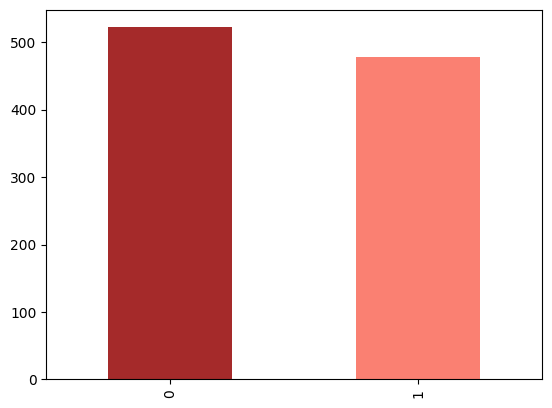

In [ ]:
df.Quality.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

In [ ]:
df['Salinity'].describe()

count    1000.000000
mean        1.440115
std         1.596831
min        -0.994000
25%        -0.007750
50%         0.959000
75%         2.937000
max         4.000000
Name: Salinity, dtype: float64

# Partitioning

In [ ]:
X = df.drop('Quality',axis=1)

In [ ]:
X

,Salinity,cholorophyll,Turbidity
0,3.185,0.029,-0.040
1,3.802,0.080,-0.092
2,3.509,0.039,-0.113
3,2.937,-0.014,-0.197
4,2.922,-0.066,-0.079
...,...,...,...
995,0.228,0.011,0.339
996,-0.682,-0.018,0.370
997,-0.157,-0.078,0.160
998,-0.530,0.037,0.235


In [ ]:
Y= df['Quality']

In [ ]:
print(X.shape)
print(Y.shape)

(1000, 3)
(1000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.30, random_state=26,shuffle=True)
#26

In [ ]:
Y_train.value_counts()

0    373
1    327
Name: Quality, dtype: int64

In [ ]:
Y_test.value_counts()

1    151
0    149
Name: Quality, dtype: int64

# Model Building

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)
rf_predict = rf_classifier.predict(X_test)

In [ ]:
rf_accuracy = round(accuracy_score(Y_test, rf_predict),2)
print("Accuracy:", rf_accuracy)

Accuracy: 0.99


In [ ]:
confusion_matrix(rf_predict,Y_test)

array([[146,   1],
       [  3, 150]])

# SVM

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train,Y_train)
svm_predict = svm_classifier.predict(X_test)

In [ ]:
svm_accuracy=round(accuracy_score(Y_test,svm_predict),2)
print(svm_accuracy)

0.95


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
knn_predict = knn_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, knn_predict)
knn_accuracy = accuracy_score(Y_test, knn_predict)
print(cm)
round(knn_accuracy,2)

[[139  10]
 [  5 146]]


0.95

# DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
dt_classifier=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt_classifier.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [ ]:
dt_predict=dt_classifier.predict(X_test)
dt_accuracy=accuracy_score(Y_test,dt_predict)
round(dt_accuracy,2)

0.99

In [ ]:
print("Accuracy on training set: {:.3f}".format(dt_classifier.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt_classifier.score(X_test, Y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.990


In [ ]:
confusion_matrix(Y_test,dt_predict)

array([[149,   0],
       [  3, 148]])

# Naive bayes

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
nb_predict =  nb_classifier.predict(X_test)
nb_predict
Y_test

769    0
824    0
107    1
921    1
157    1
      ..
26     1
488    0
242    1
561    0
859    0
Name: Quality, Length: 300, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, nb_predict)
nb_accuracy = round(accuracy_score(Y_test,nb_predict),2)

In [ ]:
nb_accuracy

0.93

In [ ]:
cm

array([[141,   8],
       [ 13, 138]])

# Algorithm comparison

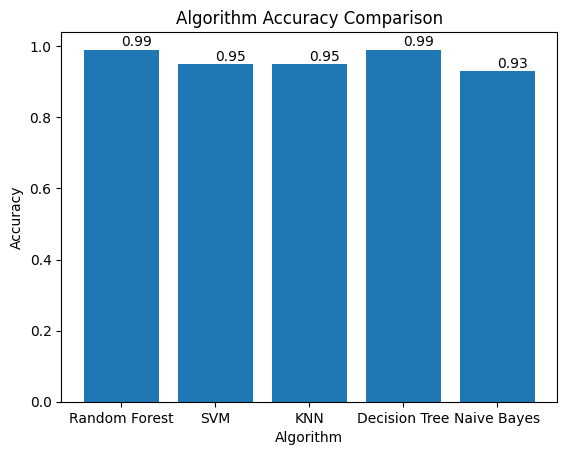

In [ ]:
algorithms = ['Random Forest', 'SVM', 'KNN','Decision Tree','Naive Bayes']
accuracies = [rf_accuracy,svm_accuracy,knn_accuracy,dt_accuracy,nb_accuracy]

# Plot the data as a bar chart
plt.bar(algorithms, accuracies)

# Add axis labels and a title
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Algorithm Accuracy Comparison')

for i, v in enumerate(accuracies):
  plt.text(i, v + 0.01, str(v))
# Display the plot
plt.show()

# Prediction on extracted data

Lonar Lake (0 indicates poor water quality consisting of high cholorphyll and salinity )

In [ ]:
X_RF = rf_classifier.predict([[data_ndsi_lonar,data_ndci_lonar,data_ndti_lonar]])[0]

In [ ]:
X_RF

0

Bay of Bengal (1 indicates better water quality consisting of low cholorphyll and salinity )

In [ ]:
X_RF1= rf_classifier.predict([[data_ndsi_BOB,data_ndci_BOB,data_ndti_BOB]])[0]

In [ ]:
X_RF1

1

Arabian Sea near southern part of Indian sub-continent (0 indicates poor water quality consisting of high cholorphyll and salinity )

In [ ]:
X_RF2= rf_classifier.predict([[data_ndsi_south,data_ndci_south,data_ndti_south]])[0]

In [ ]:
X_RF2

0